In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

## Exploratory Data Analysis 
Importing the datn.

In [2]:
df = pd.read_csv('C:/Users/VAMSI/Desktop/IIT Bombay/Semester 1/CS 725 FML/Course Project/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# Convert 'Order Date' column to pandas datetime format for easier date manipulation
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

# Extract the month from 'Order Date' and add it as a new feature in Period format
df['month'] = pd.to_datetime(df['Order Date']).dt.to_period('M')

# Display the first few rows of the modified DataFrame
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,month
0,1,CA-2017-152156,2017-11-08,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11
1,2,CA-2017-152156,2017-11-08,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11
2,3,CA-2017-138688,2017-06-12,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06
3,4,US-2016-108966,2016-10-11,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10
4,5,US-2016-108966,2016-10-11,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10


In [4]:
df.describe()

,Row ID,Order Date,Postal Code,Sales
count,9800.000000,9800,9789.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,55273.322403,230.769059
min,1.000000,2015-01-03 00:00:00,1040.000000,0.444000
25%,2450.750000,2016-05-24 00:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-26 00:00:00,58103.000000,54.490000
75%,7350.250000,2018-05-15 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,32041.223413,626.651875


The describe() method provides the following insights:

The dataset contains 9,800 records related to sales.
Sales values range from 0.444 to 22,638.48, with an average of 230.77 and a standard deviation of 626.65.
Next, we will verify if there are any missing values in the dataset.

In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
month             0
dtype: int64

This output represents the count of missing (null) values for each column in the dataset. Here's a brief overview:

Most columns, such as Row ID, Order ID, Order Date, and others, have no missing values (0 null values).
The Postal Code column has 11 missing values, indicating that this data is incomplete for some rows.
All other columns, including Sales and the newly created month column, are complete with no missing values.

In [6]:
df[df['Postal Code'].isnull()]
(df[df['City']=='Burlington']['Postal Code'].isnull()==True).index[0]

683

The output indicates that the first row in the dataset where the City is "Burlington" and the Postal Code is missing (NaN) has an index value of 683.


In [7]:
# All missing values are in the same city Bulringon. We can fill null postal code with any of postal codes in that city. 
warnings.filterwarnings('ignore')
df['Postal Code'].fillna((df[df['City']=='Burlington']['Postal Code'].isnull()==True).index[0], inplace=True)

Let's see how many unique values in each of State, Product ID, Category, Sub-Category, and Ship Mode

In [8]:
print('* There are stores in {} states'.format(len(df['State'].unique())))
print('* There are {} different products'.format(len(df['Product ID'].unique())))
print('* There are {} different categories'.format(len(df['Category'].unique())))
print('* There are {} different sub categories'.format(len(df['Sub-Category'].unique())))
print('* There are {} different ship mode'.format(len(df['Ship Mode'].unique())))

* There are stores in 49 states
* There are 1861 different products
* There are 3 different categories
* There are 17 different sub categories
* There are 4 different ship mode


In [9]:
# Function to group and visualize sales based on a specified feature.
# The function takes the feature name and the number of top categories to visualize.
def sales_plot_by_group(group, top=50, color='blue'):    
    sales_by_group = df.groupby(group)['Sales'].sum()  # Aggregate total sales for each category of the specified feature.
    sales_by_group.sort_values(ascending=False, inplace=True)  # Sort the categories in descending order of sales.
    sales_by_group = sales_by_group.head(top)  # Select the top categories with the highest sales.
    
    plt.figure(figsize=(15, 4))  # Set the figure size for better readability.
    plt.title('Sales by {}'.format(group))  # Set the chart title based on the feature.
    plt.ylabel('Sales in USD')  # Label the y-axis to indicate the unit of sales.
    plt.bar(sales_by_group.index, sales_by_group, color=color, alpha=0.5)  # Plot a bar chart with specified color and transparency.
    plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility.

    # Annotate each bar with the total sales amount at the center of the bar.
    for x, y in sales_by_group.items():
        plt.text(x, sales_by_group.max() / 2, f'${int(y):,.0f}', 
                 rotation=90, horizontalalignment='center', fontsize=12)
    plt.show  # Display the plot.


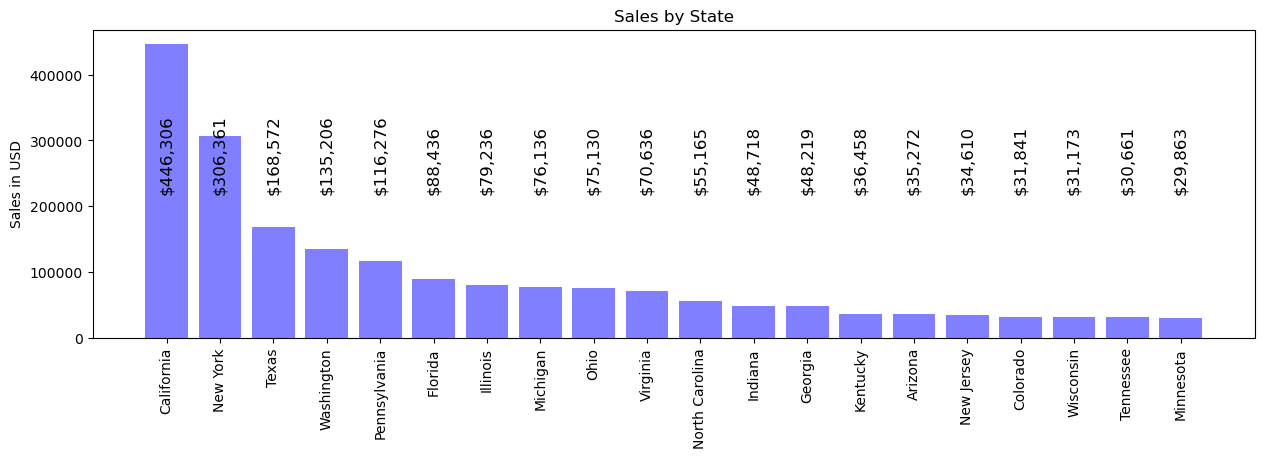

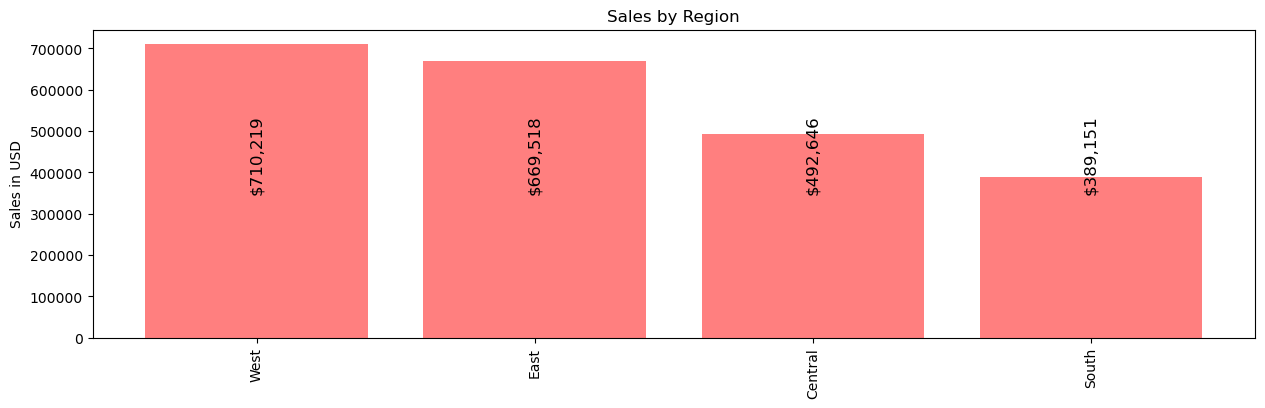

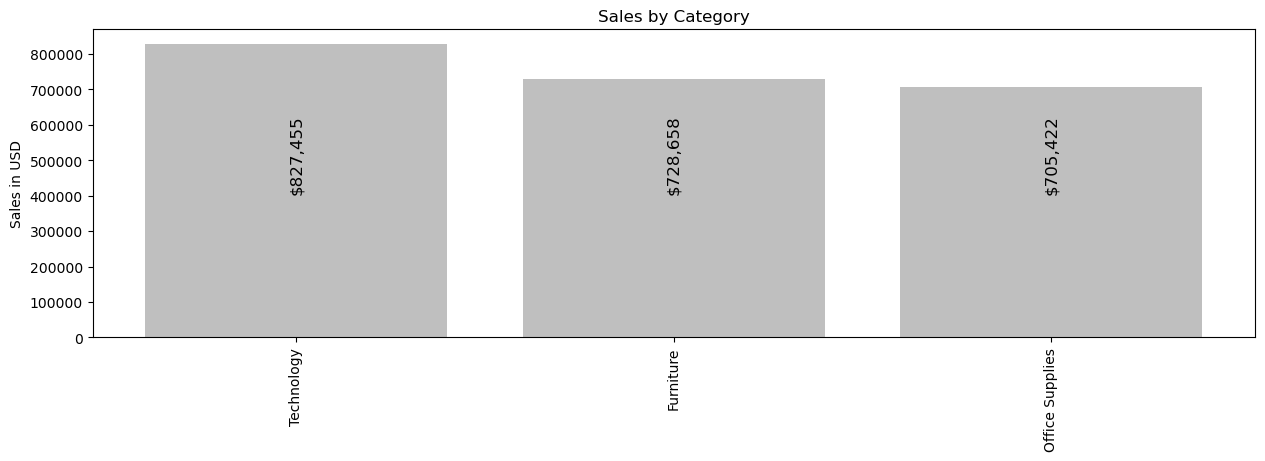

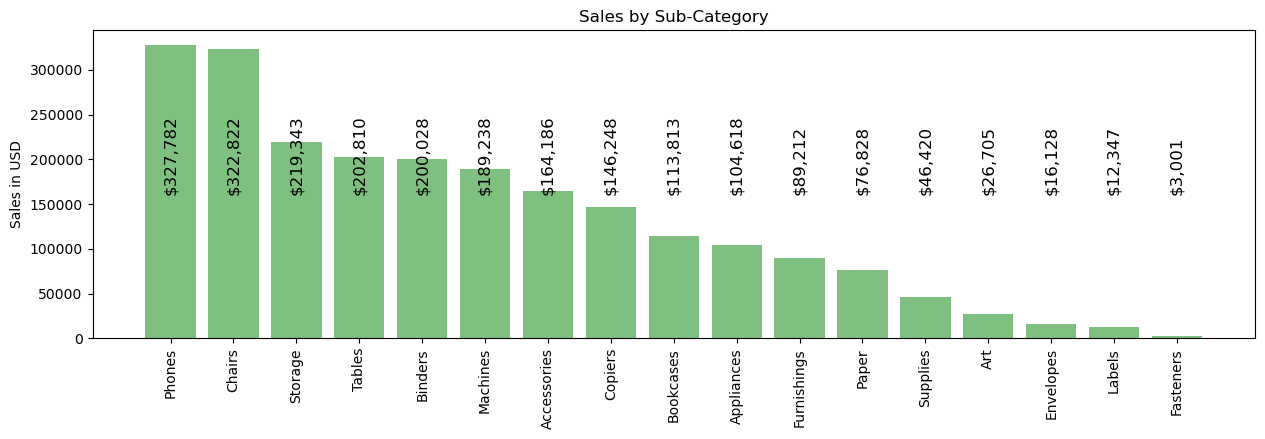

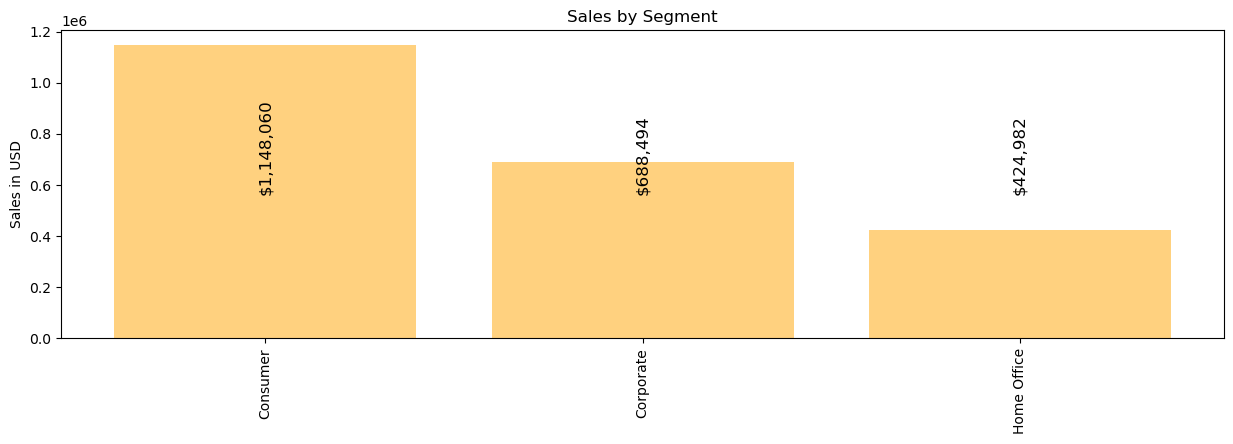

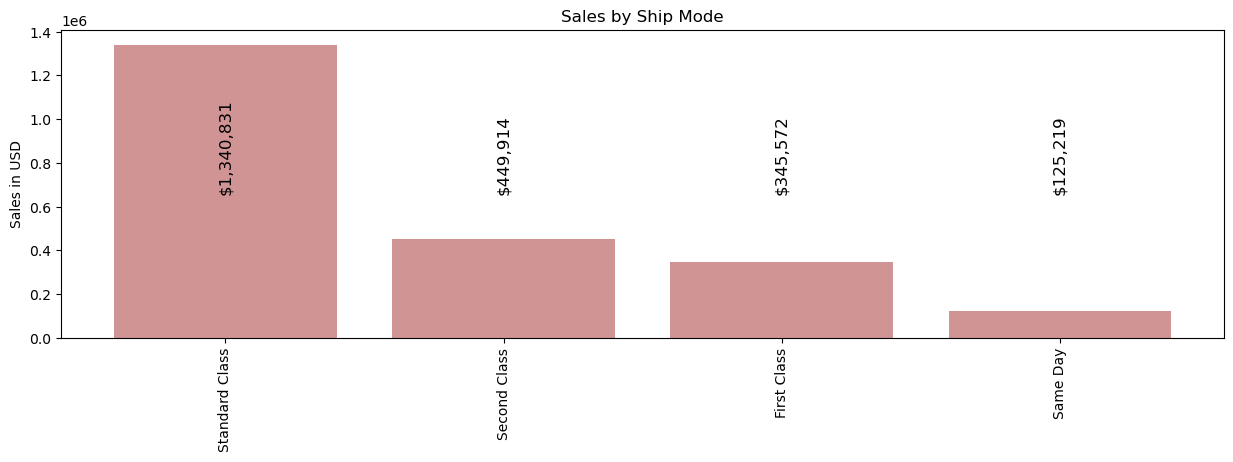

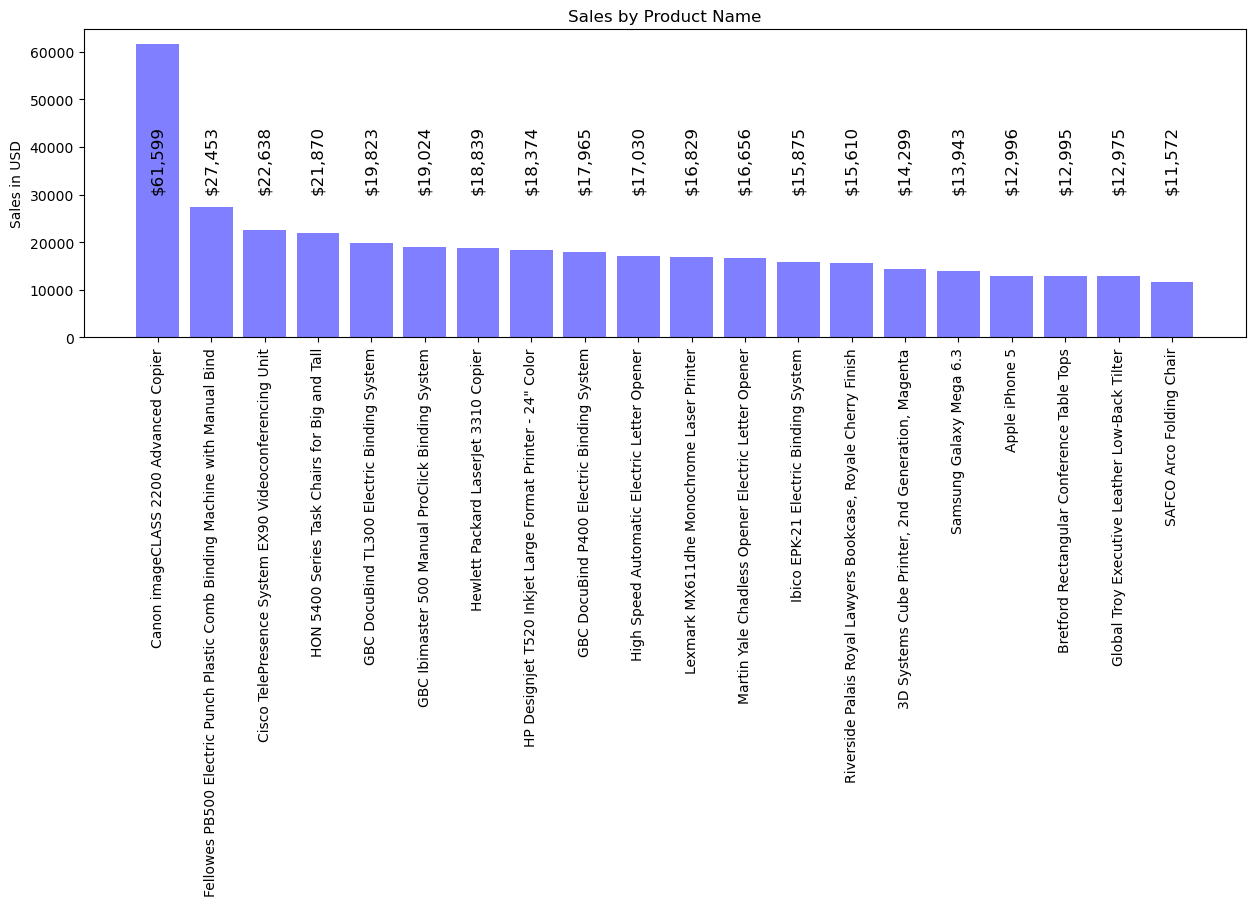

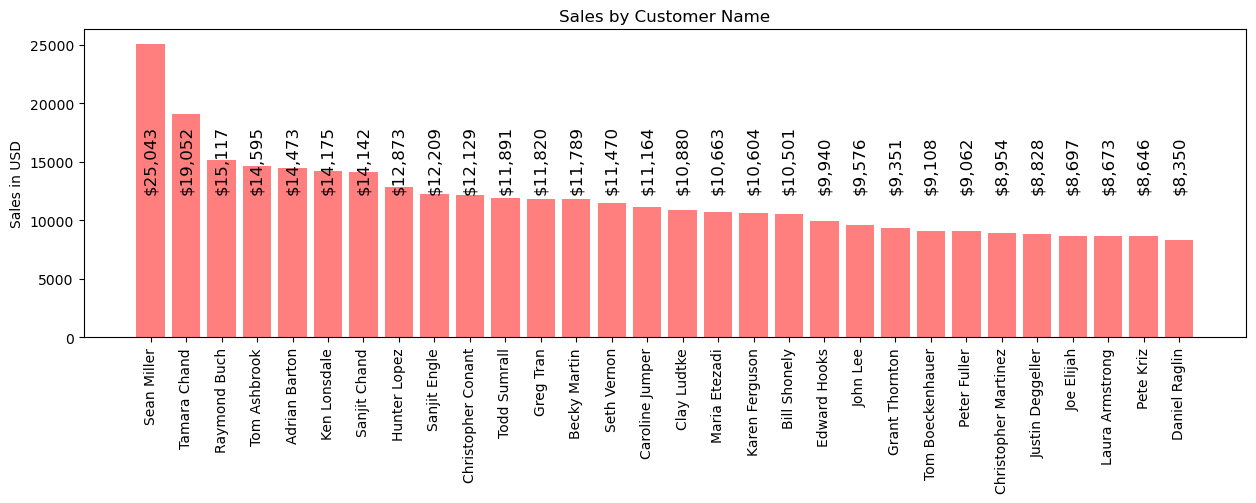

In [10]:
sales_plot_by_group('State',20, color='blue') # plot sales per state and show 20 top states
sales_plot_by_group('Region',color='red') # plot sales per region
sales_plot_by_group('Category',color ='gray') # plot sales by category
sales_plot_by_group('Sub-Category',color='green') # plot sales by sub-category
sales_plot_by_group('Segment',color='orange') # plot sales by segment
sales_plot_by_group('Ship Mode',color='brown') # plot sales by ship mode
sales_plot_by_group('Product Name', 20, color='blue') # plot sales by product name
sales_plot_by_group('Customer Name',30, color='red') # plot sales by customer name

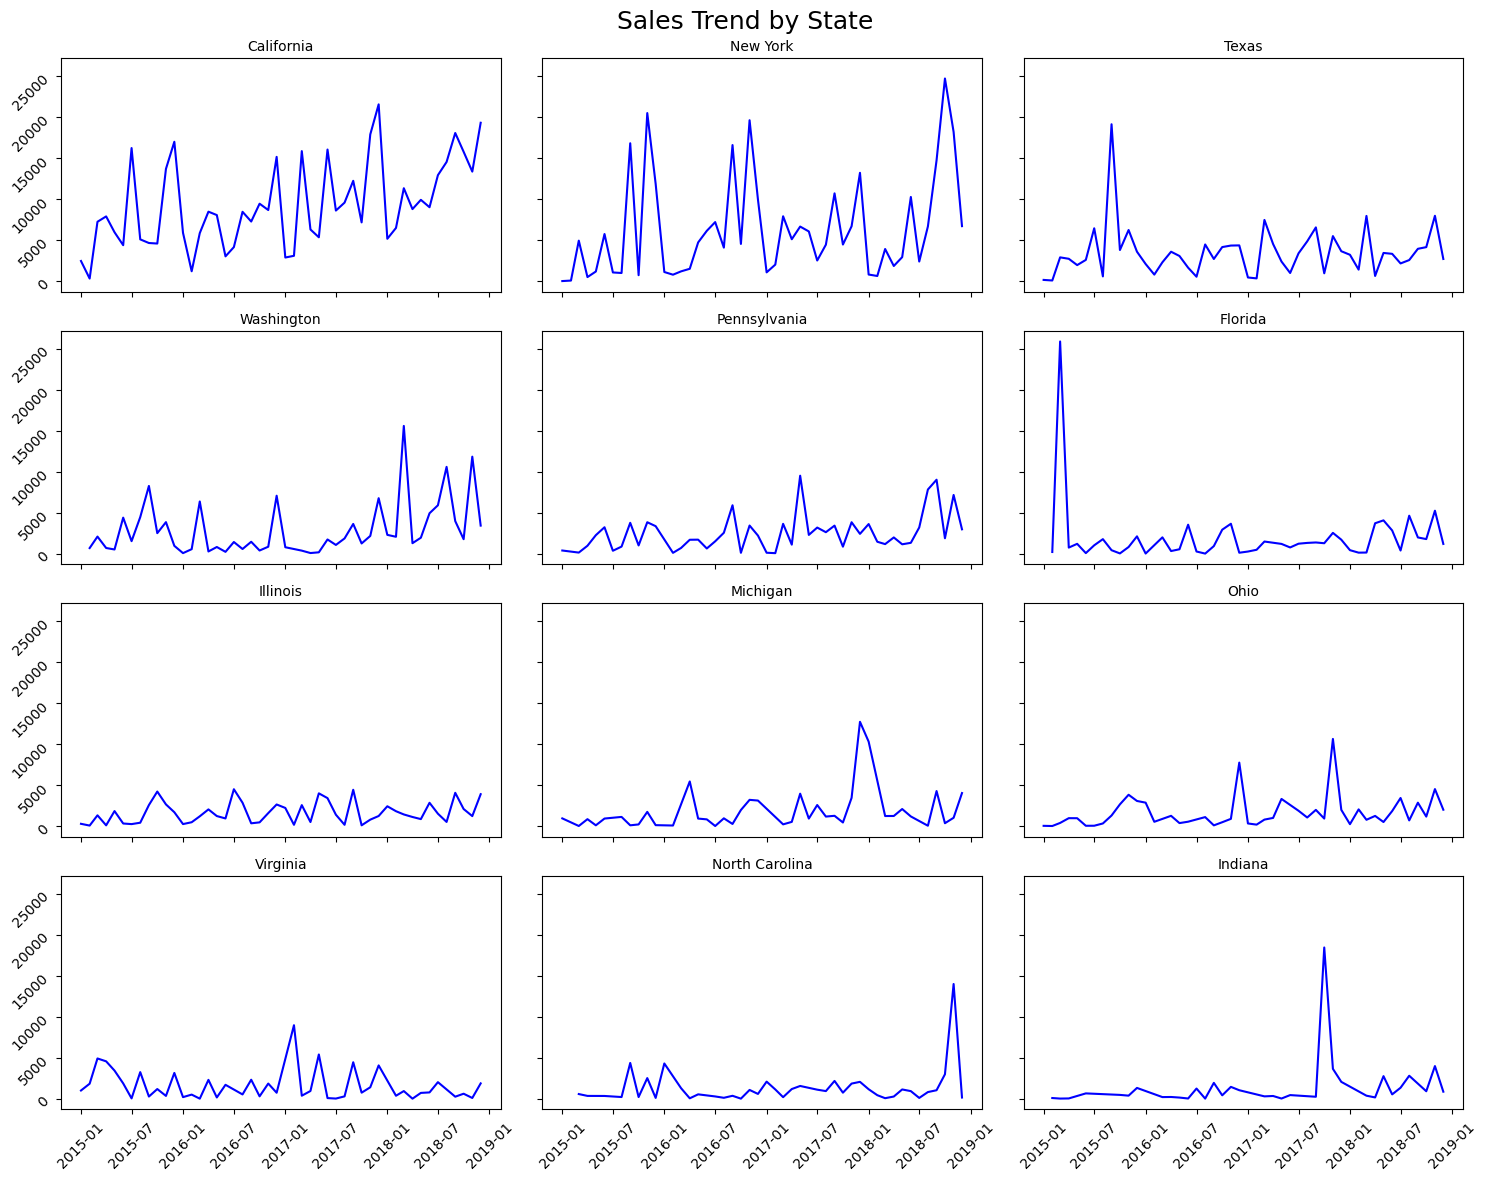

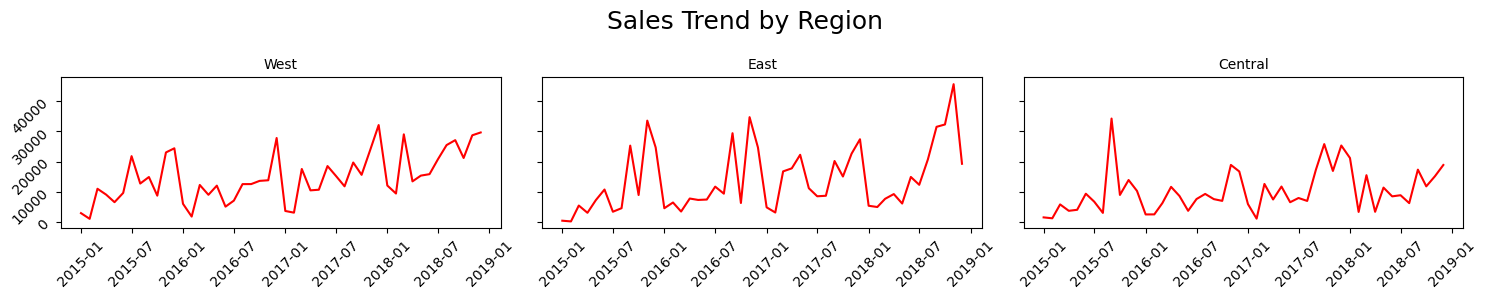

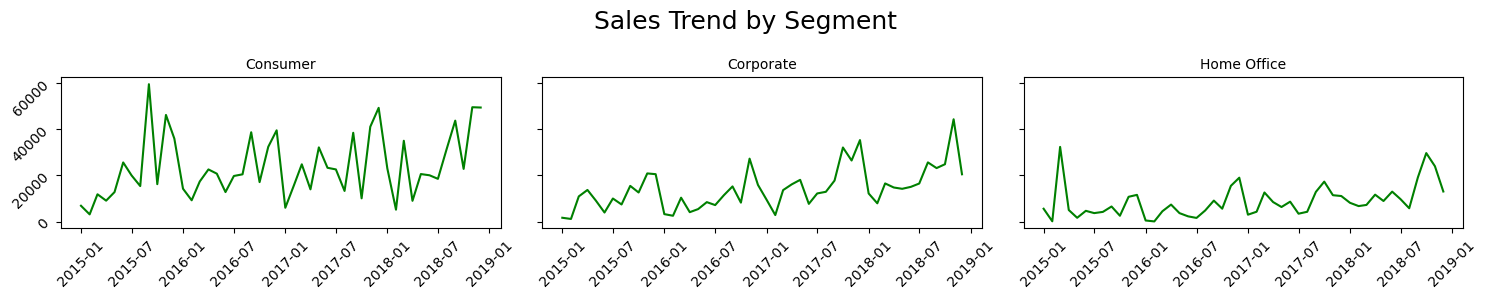

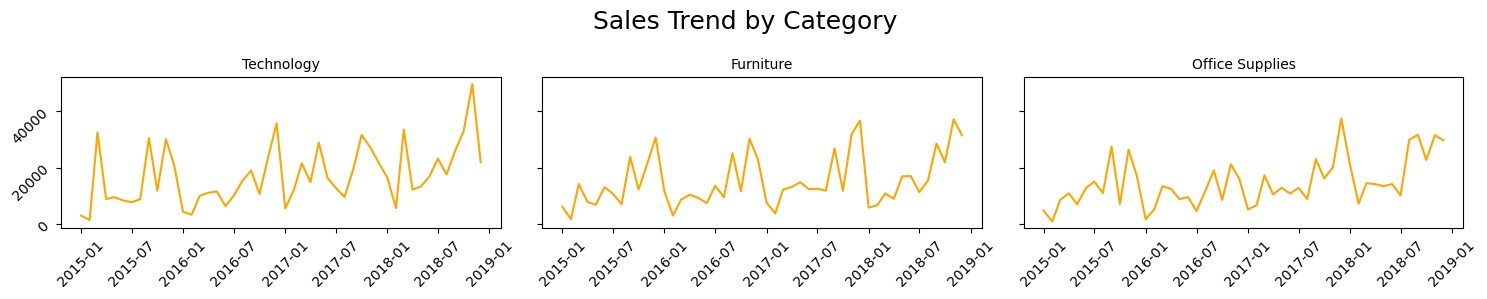

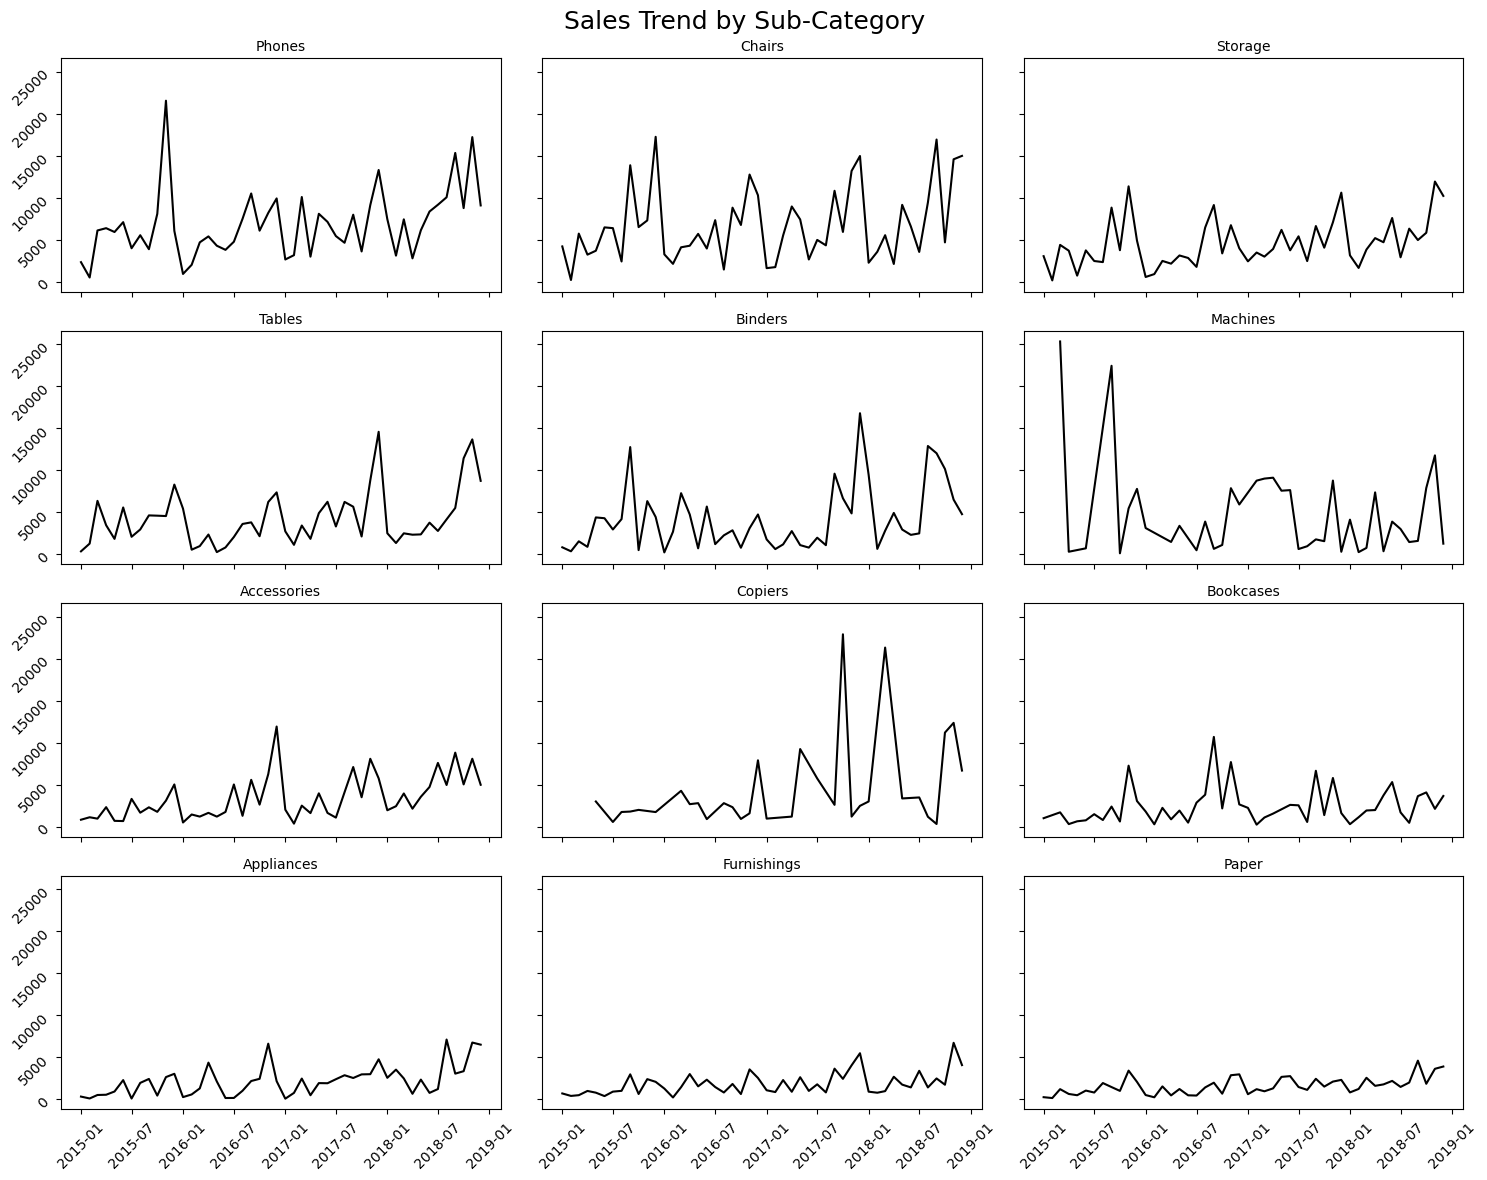

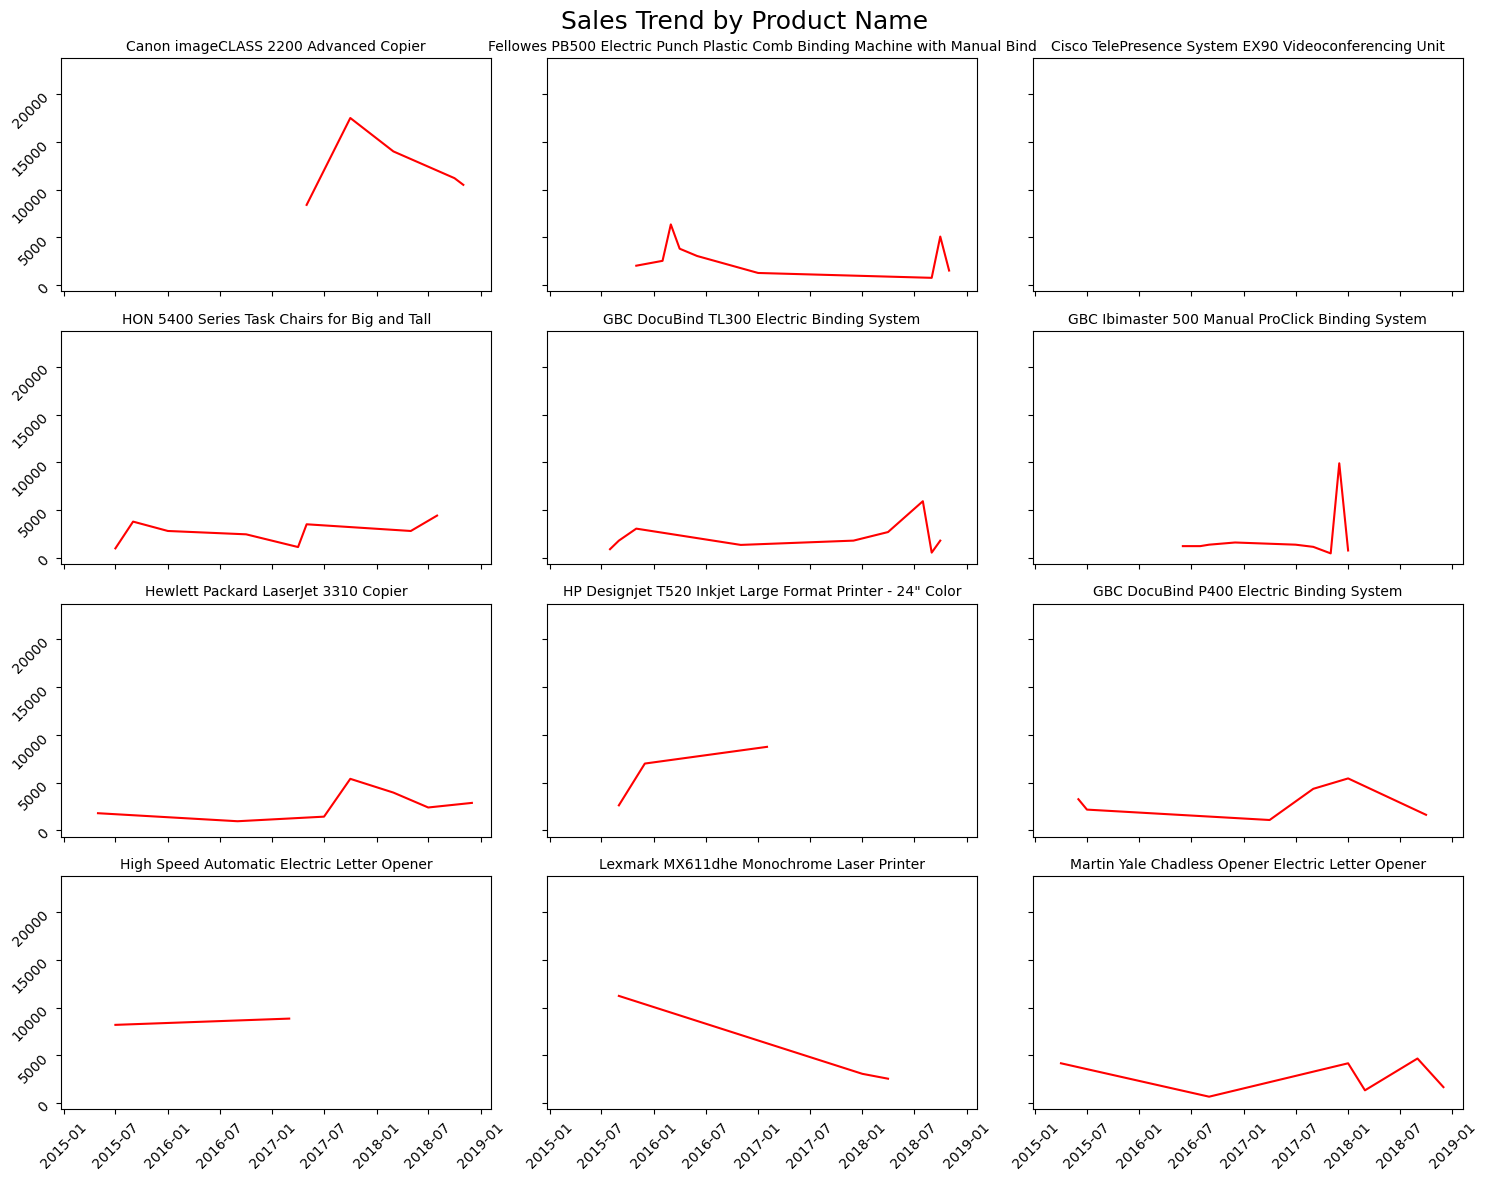

In [11]:
# Function to visualize sales trends across selected categories of a specified feature
def plot_trend_group(group, size, color='blue'):
    sales_by_group = df.groupby(group)['Sales'].sum()  # Aggregate total sales for each category within the feature.
    sales_by_group.sort_values(ascending=False, inplace=True)  # Sort categories by sales in descending order.
    sales_by_group.head(size)  # Select the top categories based on sales.

    # Create a grid of subplots with 3 plots per row
    fig, axes = plt.subplots(int(size / 3), 3, figsize=(15, size), sharex=True, sharey=True)
    fig.suptitle('Sales Trend by {}'.format(group), fontsize=18)  # Set the overall title for the plots.

    # Iterate through the top categories and plot the sales trend for each
    for ax, group_name in zip(axes.flat, sales_by_group.index):
        sales_group = df[df[group] == group_name]  # Filter data for the current category.
        sales_group = sales_group.groupby('month')['Sales'].sum()  # Aggregate monthly sales for the category.
        sales_group.index = sales_group.index.to_timestamp()  # Convert the period index to datetime for plotting.
        ax.tick_params(labelrotation=45)  # Rotate x-axis labels for better readability.
        ax.set_title(group_name, fontsize=10)  # Set the title for each subplot.
        ax.plot(sales_group, color=color)  # Plot the sales trend for the current category.

    fig.tight_layout()  # Adjust the layout for better spacing.

# Plot sales trends for various features
plot_trend_group('State', 12)  # Sales trends for the top 12 states.
plot_trend_group('Region', 3, 'red')  # Sales trends across different regions.
plot_trend_group('Segment', 3, 'green')  # Sales trends for customer segments.
plot_trend_group('Category', 3, 'orange')  # Sales trends for product categories.
plot_trend_group('Sub-Category', 12, 'black')  # Sales trends for the top 12 sub-categories.
plot_trend_group('Product Name', 12, 'red')  # Sales trends for the top 12 product names.


We observe the following insights from the sales data analysis:

States: Sales trends and seasonality vary significantly across different states.

Regions: Sales patterns across regions are relatively similar.

Categories: Product categories exhibit comparable sales trends.

Sub-Categories: Sub-categories display distinct trends and seasonality patterns.

Products: The dataset size is insufficient to establish clear seasonality and trends for individual products.





duct.

## Monthly Sales 

Let's calculate monthly sales

In [12]:
monthly_sales = df.groupby('month')['Sales'].sum()
monthly_sales = pd.DataFrame(monthly_sales)
monthly_sales['time'] = np.arange(len(monthly_sales.index))
monthly_sales.head()

,Sales,time
month,,
2015-01,14205.707,0
2015-02,4519.892,1
2015-03,55205.797,2
2015-04,27906.855,3
2015-05,23644.303,4


## Moving Average

Applying a moving average to visualize deviations from the 3-month average and identify patterns or trends in the data.








<Axes: title={'center': 'Moving Average'}, xlabel='month'>

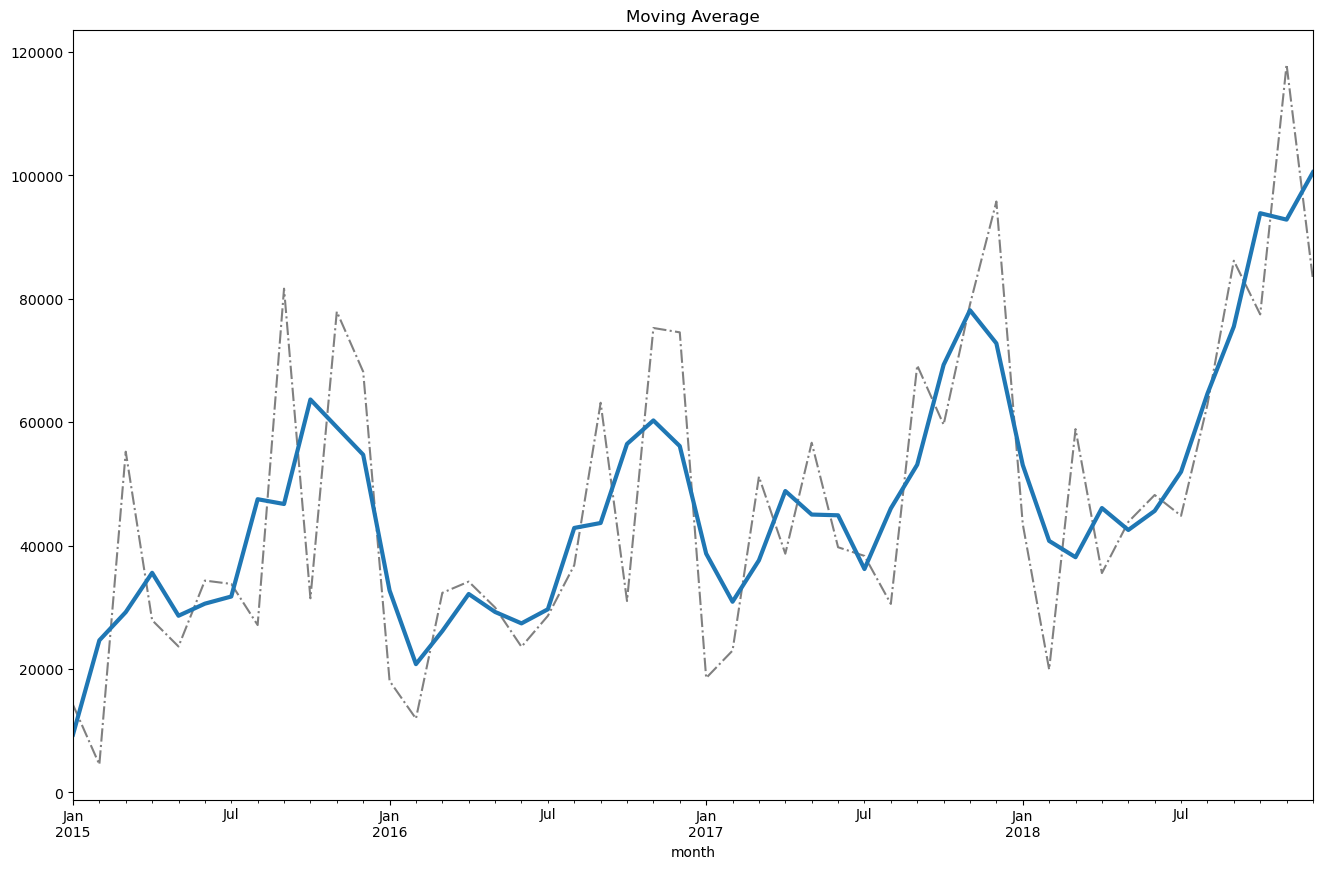

In [13]:
plt.figure(figsize=(16, 10))
# Calculate the moving average of sales with a 3-month window, centered, and minimum period of 1
moving_average = monthly_sales['Sales'].rolling(window=3, center=True, min_periods=1).mean()

# Plot the original sales data with a dashed line style and gray color
ax = monthly_sales['Sales'].plot(style="-.", color="0.5")

# Set the title of the plot
ax.set_title('Moving Average')

# Plot the moving average on the same axis with a thicker line for visibility
moving_average.plot(ax=ax, linewidth=3)


## Prediction Models
We begin with a linear regression model to forecast sales for 2019. Sales data from 2018 will serve as the evaluation dataset for the model. The performance of each model will be assessed using the R² score based on predictions for 2018.

## Linear Regression

Linear regression is a fundamental regression model. We will enhance it with engineered features to incorporate both trend and seasonality into the predictions.








In [14]:
# Import necessary modules for adding engineering features (trend and seasonality)
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier

# Create a Fourier series with monthly frequency (ME) and order 4 to capture seasonality
fourier = CalendarFourier(freq='ME', order=4)

# Initialize DeterministicProcess to generate engineered features
dp = DeterministicProcess(
    index=monthly_sales.index,  # Use the dates from the training data as the index
    constant=True,              # Include a constant (bias term) for the model (intercept)
    order=2,                    # Include a time-based feature (trend), order=2 for quadratic trend
    additional_terms=[fourier], # Add Fourier terms to capture the seasonal components
    seasonal=True,              # Enable the inclusion of seasonal effects
    drop=True                   # Drop the original time index to avoid multicollinearity
)

# Generate the engineered features (X) for the training data
X = dp.in_sample()


In [15]:
X.head(15)

,const,trend,trend_squared,"s(2,12)","s(3,12)","s(4,12)","s(5,12)","s(6,12)","s(7,12)","s(8,12)","s(9,12)","s(10,12)","s(11,12)","s(12,12)"
month,,,,,,,,,,,,,,
2015-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-03,1.0,3.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-04,1.0,4.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-05,1.0,5.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,1.0,6.0,36.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07,1.0,7.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-08,1.0,8.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-09,1.0,9.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
# Define the target variable (sales) for the model
y = monthly_sales['Sales']  # The 'Sales' column from the dataset is our target variable (y)

# Split the data into training and test sets
X_train = X.loc[:'2017-12']  # Select all data from X up to December 2017 for training
X_test = X.loc['2018-01':]   # Select data from January 2018 onwards for testing
y_train = y.loc[:'2017-12']  # Select the corresponding sales data up to December 2017 for training
y_test = y.loc['2018-01':]   # Select the corresponding sales data from January 2018 onwards for testing


In [17]:
X_train.head(5)

,const,trend,trend_squared,"s(2,12)","s(3,12)","s(4,12)","s(5,12)","s(6,12)","s(7,12)","s(8,12)","s(9,12)","s(10,12)","s(11,12)","s(12,12)"
month,,,,,,,,,,,,,,
2015-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-03,1.0,3.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-04,1.0,4.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-05,1.0,5.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
y.head(5)

month
2015-01    14205.707
2015-02     4519.892
2015-03    55205.797
2015-04    27906.855
2015-05    23644.303
Freq: M, Name: Sales, dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model without the intercept term
model = LinearRegression(fit_intercept=False)

# Fit the model using the training data (X_train and y_train)
model.fit(X_train, y_train)

# Generate predictions for the training data (X_train) using the fitted model
y_pred1 = pd.Series(model.predict(X_train), index=X_train.index)

# Generate predictions for the test data (X_test) using the same fitted model
y_pred2 = pd.Series(model.predict(X_test), index=X_test.index)

# Make predictions for the future (for the year 2019), using the model to forecast the next 18 months
y_forecast = pd.Series(model.predict(dp.out_of_sample(steps=12)), index=dp.out_of_sample(steps=12).index)


We will evaluate the predictions of each model using various metrics from sklearn.

In [20]:
# Define a function to evaluate model predictions based on multiple metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# List to store evaluation metrics for each model
list_metrics = []

# Format for displaying the evaluation metrics
formatl = ['{:<20} ','| {:^6.2f} ','| {:^6.0f} ','| {:^12,.0f}']

# Function to evaluate the model using R2, MAE, and MSE
def evaluate_model(model_name, y_true, y_pred):
    # Calculate R2, MAE, and MSE
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    # Append the metrics for the current model to the list
    list_metrics.append([model_name, r2, mae, mse])
    
    # Print the header row for the metrics table
    print('{:^20} | {:^6} | {:^6} | {:^12}'.format('Model', 'R2', 'MAE', 'MSE'))
    
    # Print each model's evaluation metrics in the specified format
    for metrics in list_metrics:
        for format_, value in zip(formatl, metrics):
            print(format_.format(value), end="")
        print()


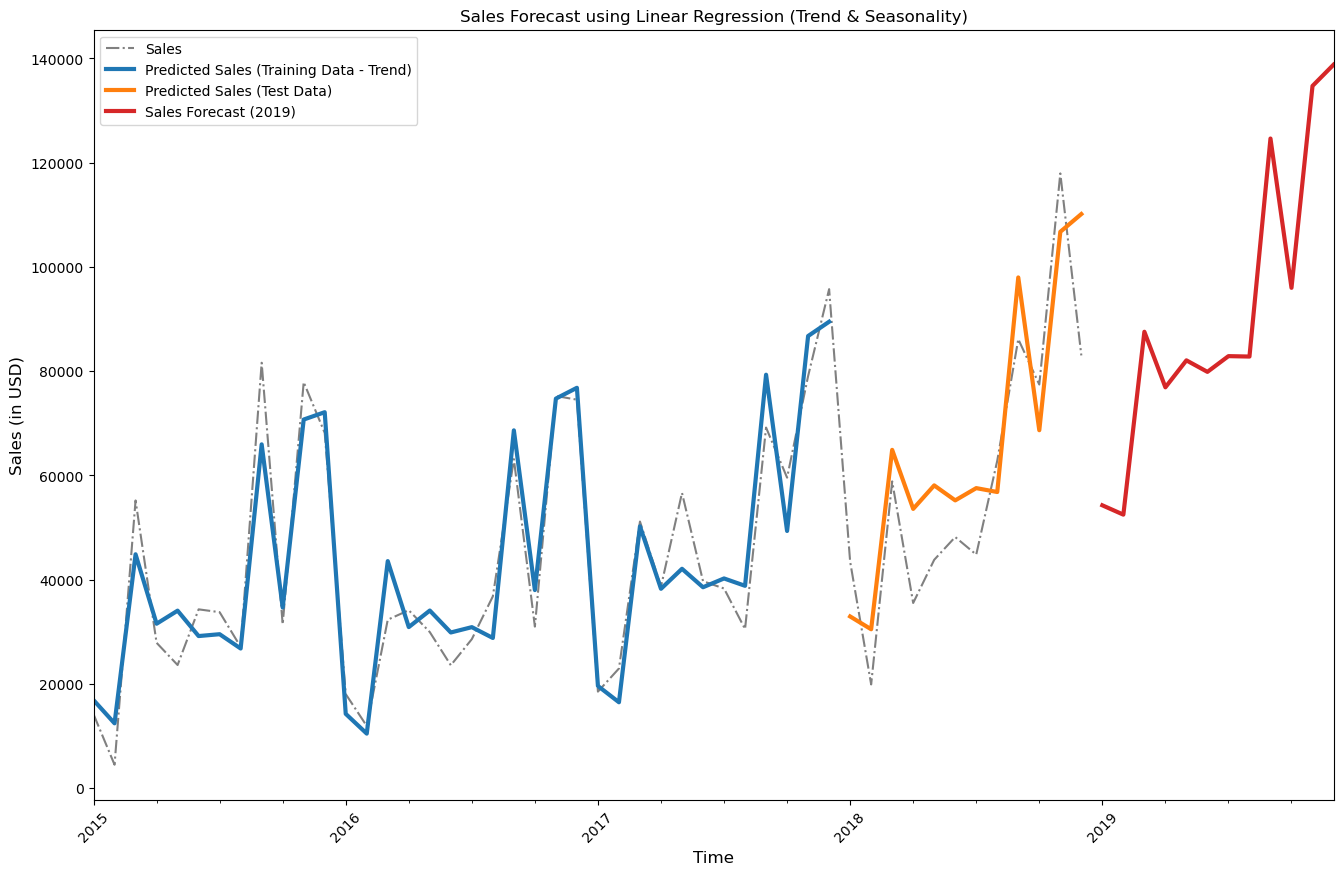

In [21]:
# Plot the predicted sales data and compare it with actual train and test data
plt.figure(figsize=(16, 10))
# Plot the actual sales data for the training period (using a dashed line for distinction)
ax = monthly_sales['Sales'].plot(style="-.", color="0.5", title="Sales Forecast using Linear Regression (Trend & Seasonality)")

# Plot the predicted sales for the training data (trend)
ax = y_pred1.plot(ax=ax, linewidth=3, label="Predicted Sales (Training Data - Trend)")

# Plot the predicted sales for the test data (future period, e.g., 2018)
ax = y_pred2.plot(ax=ax, linewidth=3, label="Predicted Sales (Test Data)")

# Plot the forecasted sales for the future (e.g., for 2019)
ax = y_forecast.plot(ax=ax, linewidth=3, label="Sales Forecast (2019)", color='C3')

# Adding labels, legends, and title for clarity
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Sales (in USD)", fontsize=12)
ax.legend()  # Show legend for the labels
ax.tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


In [22]:
# R-squared is used to assess the accuracy of the prediction by comparing it to the actual train and test data

# Calculate R-squared for the training data prediction
r_squared_train = r2_score(y_train, y_pred1)
print('R-squared for Training Data Prediction: ', r_squared_train)

# Calculate R-squared for the test data (2018) prediction
r_squared_test = r2_score(y_test, y_pred2)
print('R-squared for Test Data (2018) Prediction: ', r_squared_test)

# Evaluate the model performance on the test data using multiple metrics
evaluate_model('Linear Regression', y_test, y_pred2)


R-squared for Training Data Prediction:  0.9105004682072055
R-squared for Test Data (2018) Prediction:  0.7354848558367337
       Model         |   R2   |  MAE   |     MSE     
Linear Regression    |  0.74  | 12015  | 176,200,603 


## Linear Regression with AdaBoost
AdaBoost improves model performance by focusing on the mistakes made by the initial model. It adjusts the model by giving more weight to the residual errors, allowing it to learn from its previous mispredictions and make more accurate predictions.

In [23]:
from sklearn.ensemble import AdaBoostRegressor 

# Initialize AdaBoost Regressor with Linear Regression as the base estimator
ada = AdaBoostRegressor(n_estimators=40, estimator=LinearRegression(), loss='square', learning_rate=0.5, random_state=21)

# Train the model on the training data
ada.fit(X_train, y_train)

# Predict sales for both the training and testing data
y_pred1 = pd.Series(ada.predict(X_train), index=X_train.index)
y_pred2 = pd.Series(ada.predict(X_test), index=X_test.index)

# Forecast sales for the next 12 months
y_forecast = pd.Series(ada.predict(dp.out_of_sample(steps=12)), index=dp.out_of_sample(steps=12).index)

# Calculate the R-squared score for both training and testing predictions
r_squared_fit = r2_score(y_train, y_pred1)
r_squared_test = r2_score(y_test, y_pred2)

# Print the R-squared values
print(r_squared_fit)
print(r_squared_test)

# Evaluate the model on test data
evaluate_model('Linear & AdaBoost', y_test, y_pred2)


0.9303337615984215
0.771284042411156
       Model         |   R2   |  MAE   |     MSE     
Linear Regression    |  0.74  | 12015  | 176,200,603 
Linear & AdaBoost    |  0.77  | 10450  | 152,353,808 


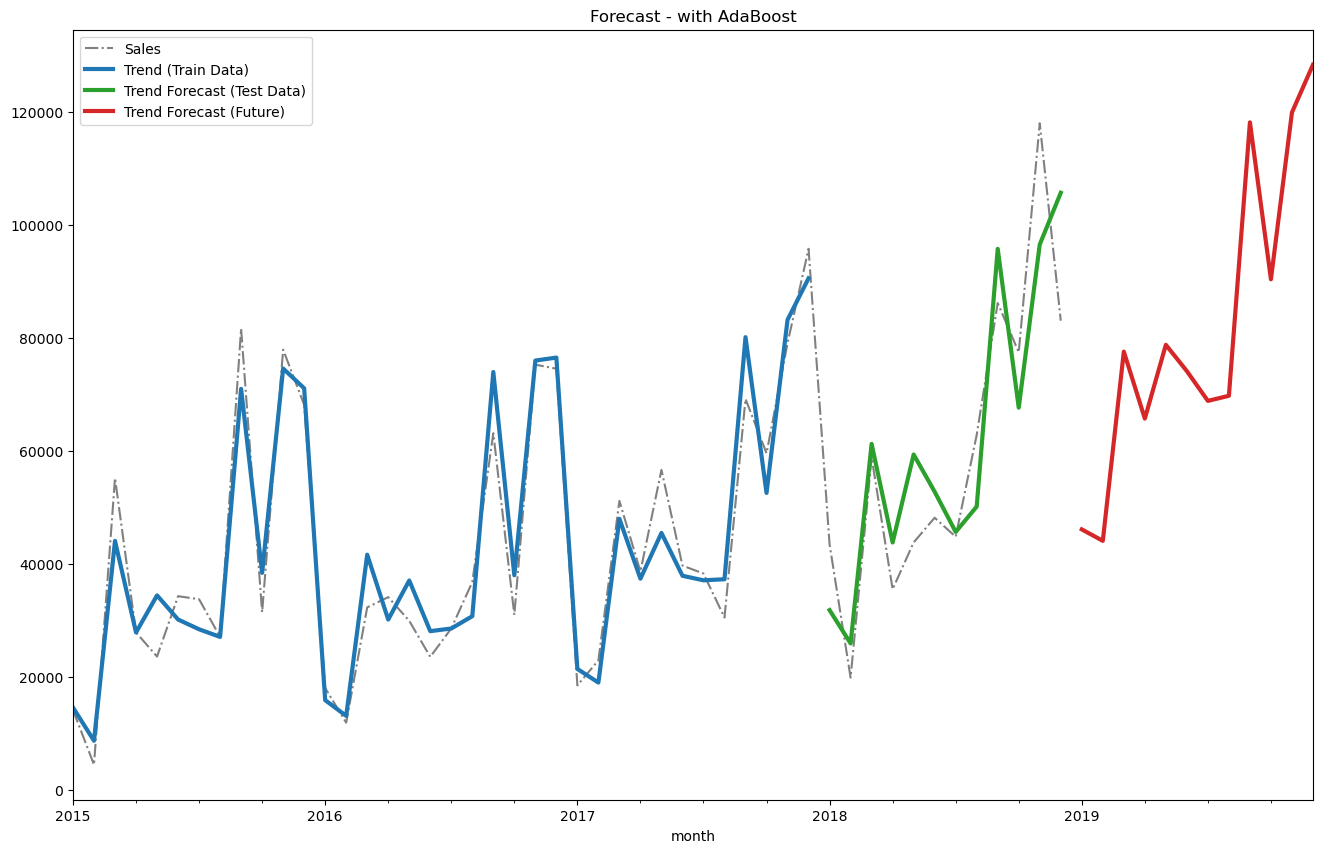

In [24]:
# Plot the actual sales data with a specific style (dashed line) and color (gray)
plt.figure(figsize=(16, 10))
ax = y.plot(style="-.", color="0.5", title="Forecast - with AdaBoost")

# Plot the predicted sales for training data (y_pred1), with a linewidth of 3, label it as "Trend"
ax = y_pred1.plot(ax=ax, linewidth=3, label="Trend (Train Data)")

# Plot the predicted sales for test data (y_pred2), with a linewidth of 3, and label it as "Trend Forecast (Test Data)"
# The color for this plot is set to 'C2' (a predefined color from matplotlib's color cycle)
ax = y_pred2.plot(ax=ax, linewidth=3, label="Trend Forecast (Test Data)", color='C2')

# Plot the forecasted sales for the future period (y_forecast), with a linewidth of 3, 
# and label it as "Trend Forecast (Future)"
ax = y_forecast.plot(ax=ax, linewidth=3, label="Trend Forecast (Future)", color='C3')

# Add a legend to the plot to differentiate between the lines
ax.legend()

# Show the plot
plt.show()



### Random Forest Regression 

In [25]:
# Initialize the RandomForestRegressor with 50 estimators (trees)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=50)

# Train the model using the training data (X_train and y_train)
rfr.fit(X_train, y_train)

# Predict the sales for the training data (X_train)
# We store the predictions in y_pred1 and align the indices to match the training data
y_pred1 = pd.Series(rfr.predict(X_train), X_train.index)

# Predict the sales for the test data (X_test), which will be used for evaluation
# We store the predictions in y_pred2 and align the indices to match the test data
y_pred2 = pd.Series(rfr.predict(X_test), X_test.index)

# Calculate the R-squared value for the training data predictions
# This measures the goodness of fit for the model on the training data
r_squared_fit = r2_score(y_train, y_pred1)

# Calculate the R-squared value for the test data predictions
# This measures how well the model generalizes to unseen data (test data)
r_squared_test = r2_score(y_test, y_pred2)

# Generate forecasted sales for the next 12 periods (steps)
# The dp.out_of_sample(steps=12) generates the future period's feature data
r_forecast = pd.Series(rfr.predict(dp.out_of_sample(steps=12)), index=dp.out_of_sample(steps=12).index)

# Print the R-squared values for both training and test data predictions
print('R-squared for training data prediction: ', r_squared_fit)
print('R-squared for test data (2018) prediction: ', r_squared_test)

# Evaluate the Random Forest model's performance on the test data using various metrics
evaluate_model('Random Forest', y_test, y_pred2)


R-squared for training data prediction:  0.9352470707709931
R-squared for test data (2018) prediction:  0.037413453971379185
       Model         |   R2   |  MAE   |     MSE     
Linear Regression    |  0.74  | 12015  | 176,200,603 
Linear & AdaBoost    |  0.77  | 10450  | 152,353,808 
Random Forest        |  0.04  | 21786  | 641,204,609 


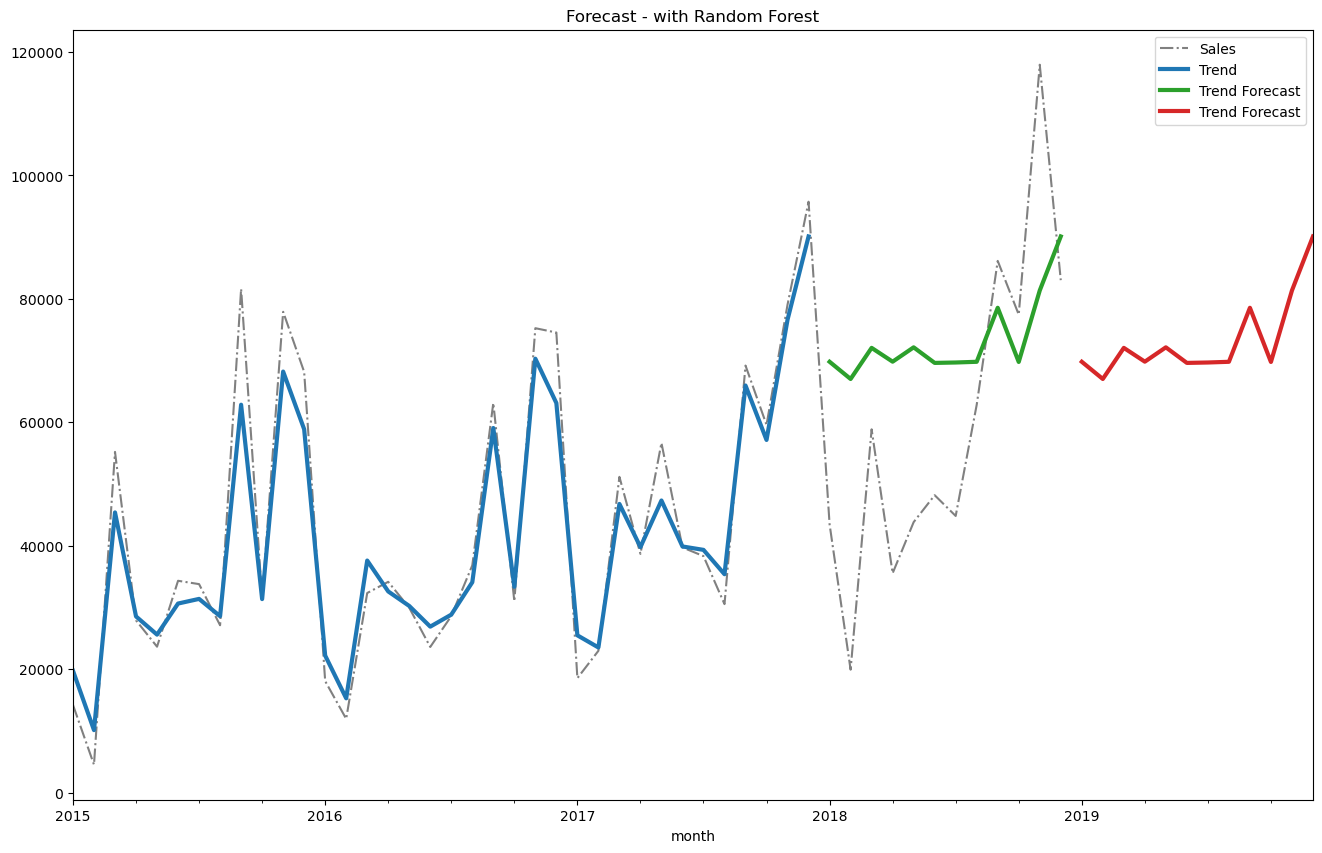

In [26]:
# Plotting the actual sales data (y) with a dashed line and neutral color (0.5)

plt.figure(figsize=(16, 10))
# The title of the plot is set to 'Forecast - with Random Forest'
ax = y.plot(style="-.", color="0.5", title="Forecast - with Random Forest")

# Plot the predicted sales for the training data (y_pred1) on top of the actual sales plot
# The line is set to have a width of 3 and is labeled as "Trend" for the legend
ax = y_pred1.plot(ax=ax, linewidth=3, label="Trend")

# Plot the predicted sales for the test data (y_pred2) on top of the previous plot
# The line is colored with 'C2' and labeled as "Trend Forecast" for the legend
ax = y_pred2.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C2')

# Plot the forecasted sales for the next 12 periods (r_forecast) as a future trend
# The line is colored with 'C3' and labeled as "Trend Forecast" for the legend
ax = r_forecast.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')

# Add a legend to the plot to distinguish between actual sales, trend, and forecasted values
ax.legend()

# Display the plot
plt.show()


## Neural Network

In [27]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Scale the features (X) and target variable (y)
scaler_X = StandardScaler()  # Initialize the scaler for features
scaler_y = StandardScaler()  # Initialize the scaler for the target variable

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler_X.fit_transform(X_train)  # Scale the training features
X_test_scaled = scaler_X.transform(X_test)        # Scale the test features using the same scaler
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  # Scale the training target variable
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))        # Scale the test target variable

# Build a simple feedforward neural network model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),  # Input layer with 64 neurons and ReLU activation
    Dropout(0.2),                                                    # Dropout layer for regularization (20% dropout rate)
    Dense(32, activation='relu'),                                    # Hidden layer with 32 neurons and ReLU activation
    Dense(1)                                                         # Output layer with 1 neuron for regression task
])

# Compile the model
model.compile(
    optimizer='adam',                 # Adam optimizer with adaptive learning rates
    loss='mse',                       # Mean Squared Error loss function for regression tasks
    metrics=['mae', 'mse']            # Evaluate using Mean Absolute Error (MAE) and Mean Squared Error (MSE)
)

# Train the model using the training data
history = model.fit(
    X_train_scaled, y_train_scaled, 
    epochs=300,                     # Train for 300 epochs
    batch_size=16,                  # Use a batch size of 16
    verbose=1,                      # Print training progress
    validation_split=0.2            # Use 20% of the data for validation during training
)

# Make predictions using the trained model
y_pred1 = model.predict(X_train_scaled)  # Predictions on the training set
y_pred2 = model.predict(X_test_scaled)   # Predictions on the test set

# Convert predictions back to the original scale
y_pred1_original = scaler_y.inverse_transform(y_pred1)  # Inverse transform the training predictions
y_pred2_original = scaler_y.inverse_transform(y_pred2)  # Inverse transform the test predictions

# Generate forecast for 2019 using the model
dp_out_of_sample = dp.out_of_sample(steps=12)  # Generate the feature set for 2019
X_forecast_scaled = scaler_X.transform(dp_out_of_sample)  # Scale the forecast features using the same scaler
y_forecast_scaled = model.predict(X_forecast_scaled)  # Make predictions for the 2019 forecast
y_forecast_original = scaler_y.inverse_transform(y_forecast_scaled)  # Convert forecast predictions to original scale

# Convert predictions to Pandas Series for easier analysis
y_pred1_series = pd.Series(y_pred1_original.flatten(), index=X_train.index)  # Create series for train predictions
y_pred2_series = pd.Series(y_pred2_original.flatten(), index=X_test.index)    # Create series for test predictions
y_forecast_series = pd.Series(y_forecast_original.flatten(), index=dp_out_of_sample.index)  # Create series for forecast

# Print the results to check predictions
print("Train Predictions:\n", y_pred1_series.head())  # Display first few train predictions
print("Test Predictions:\n", y_pred2_series.head())   # Display first few test predictions
print("Forecast for 2019:\n", y_forecast_series.head())  # Display first few forecast predictions


Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 582ms/step - loss: 1.1377 - mae: 0.8517 - mse: 1.1377 - val_loss: 1.2930 - val_mae: 0.9438 - val_mse: 1.2930
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.7723 - mae: 0.6945 - mse: 0.7723 - val_loss: 1.2082 - val_mae: 0.9212 - val_mse: 1.2082
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.7091 - mae: 0.6988 - mse: 0.7091 - val_loss: 1.1301 - val_mae: 0.9006 - val_mse: 1.1301
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.6473 - mae: 0.6540 - mse: 0.6473 - val_loss: 1.0505 - val_mae: 0.8783 - val_mse: 1.0505
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.5913 - mae: 0.6358 - mse: 0.5913 - val_loss: 0.9735 - val_mae: 0.8554 - val_mse: 0.9735
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.5238 - mae: 0.5821 - mse: 0.5238 - val_loss: 0.9041 - val_mae: 0.8329 - val_mse: 0.9041
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.5167 - mae: 0.5954 - mse: 0.5167 - val_loss: 0.8376

In [28]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,221 (36.02 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,148 (24.02 KB)

In [29]:
evaluate_model('Neural Network', y_test, y_pred2)

       Model         |   R2   |  MAE   |     MSE     
Linear Regression    |  0.74  | 12015  | 176,200,603 
Linear & AdaBoost    |  0.77  | 10450  | 152,353,808 
Random Forest        |  0.04  | 21786  | 641,204,609 
Neural Network       | -5.44  | 60170  | 4,286,580,052


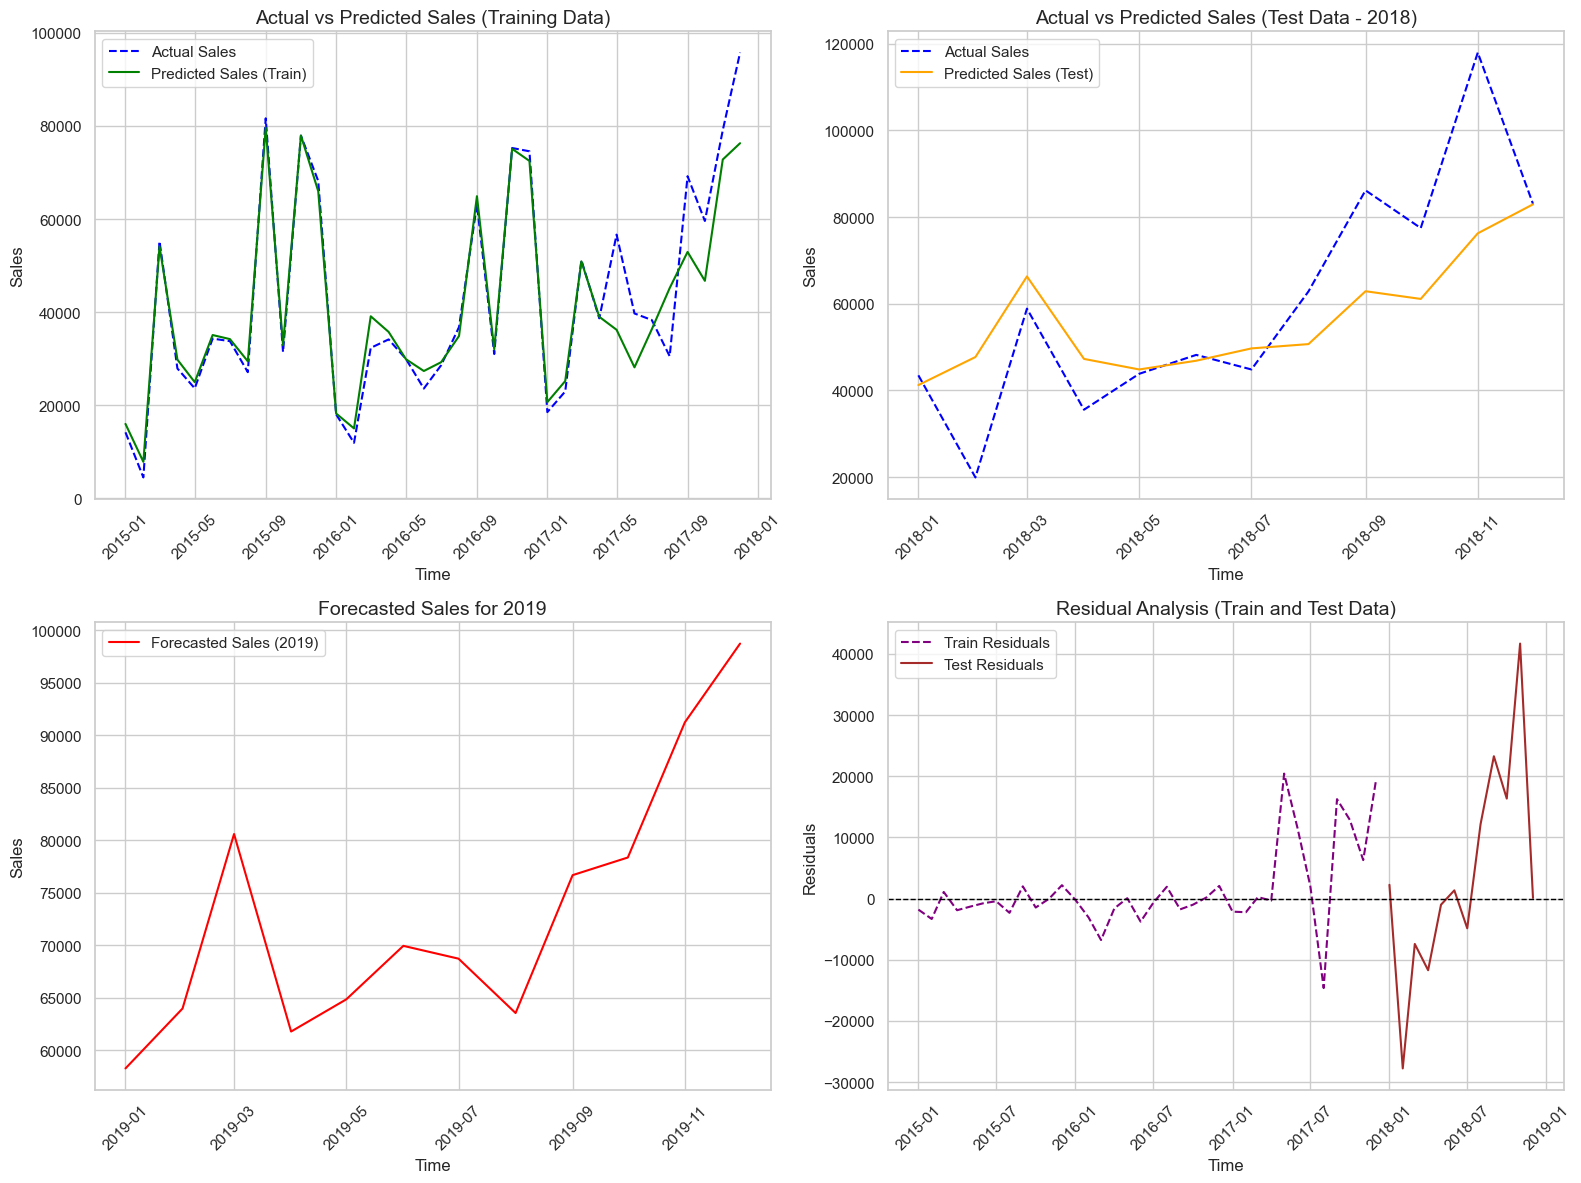

In [30]:
# Ensure that all indices are of type DatetimeIndex for proper handling in the plots
# Convert PeriodIndex to DatetimeIndex if necessary
if isinstance(y_train.index, pd.PeriodIndex):
    y_train.index = y_train.index.to_timestamp()

if isinstance(y_test.index, pd.PeriodIndex):
    y_test.index = y_test.index.to_timestamp()

if isinstance(y_pred1_series.index, pd.PeriodIndex):
    y_pred1_series.index = y_pred1_series.index.to_timestamp()

if isinstance(y_pred2_series.index, pd.PeriodIndex):
    y_pred2_series.index = y_pred2_series.index.to_timestamp()

if isinstance(y_forecast_series.index, pd.PeriodIndex):
    y_forecast_series.index = y_forecast_series.index.to_timestamp()

# Set the overall style for the plots
sns.set_theme(style="whitegrid", palette="muted")

# Create subplots for comparing actual vs predicted sales and residuals
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Plot Actual vs Predicted Sales for Training Data
axes[0, 0].plot(y_train.index, y_train, label="Actual Sales", color="blue", linestyle="--")  # Actual sales in blue dashed line
axes[0, 0].plot(y_pred1_series.index, y_pred1_series, label="Predicted Sales (Train)", color="green")  # Predicted sales in green
axes[0, 0].set_title("Actual vs Predicted Sales (Training Data)", fontsize=14)  # Title
axes[0, 0].set_xlabel("Time", fontsize=12)  # X-axis label
axes[0, 0].set_ylabel("Sales", fontsize=12)  # Y-axis label
axes[0, 0].legend()  # Show legend
axes[0, 0].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability

# 2. Plot Actual vs Predicted Sales for Test Data (2018)
axes[0, 1].plot(y_test.index, y_test, label="Actual Sales", color="blue", linestyle="--")  # Actual sales in blue dashed line
axes[0, 1].plot(y_pred2_series.index, y_pred2_series, label="Predicted Sales (Test)", color="orange")  # Predicted sales in orange
axes[0, 1].set_title("Actual vs Predicted Sales (Test Data - 2018)", fontsize=14)  # Title
axes[0, 1].set_xlabel("Time", fontsize=12)  # X-axis label
axes[0, 1].set_ylabel("Sales", fontsize=12)  # Y-axis label
axes[0, 1].legend()  # Show legend
axes[0, 1].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability

# 3. Plot Forecasted Sales for 2019
axes[1, 0].plot(y_forecast_series.index, y_forecast_series, label="Forecasted Sales (2019)", color="red")  # Forecasted sales in red
axes[1, 0].set_title("Forecasted Sales for 2019", fontsize=14)  # Title
axes[1, 0].set_xlabel("Time", fontsize=12)  # X-axis label
axes[1, 0].set_ylabel("Sales", fontsize=12)  # Y-axis label
axes[1, 0].legend()  # Show legend
axes[1, 0].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability

# 4. Plot Residuals for Training and Test Data
residuals_train = y_train - y_pred1_series  # Calculate residuals for training data
residuals_test = y_test - y_pred2_series  # Calculate residuals for test data
axes[1, 1].plot(residuals_train.index, residuals_train, label="Train Residuals", color="purple", linestyle="--")  # Residuals for training in purple
axes[1, 1].plot(residuals_test.index, residuals_test, label="Test Residuals", color="brown")  # Residuals for test in brown
axes[1, 1].set_title("Residual Analysis (Train and Test Data)", fontsize=14)  # Title
axes[1, 1].set_xlabel("Time", fontsize=12)  # X-axis label
axes[1, 1].set_ylabel("Residuals", fontsize=12)  # Y-axis label
axes[1, 1].axhline(0, color="black", linestyle="--", linewidth=1)  # Line at 0 for reference
axes[1, 1].legend()  # Show legend
axes[1, 1].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability

# Adjust the layout to avoid overlapping elements and improve appearance
fig.tight_layout()

# Display the plots
plt.show()
